### 4) Максимальное значение среди минимальных элементов строк матрицы

Идея заключается в том, что программой 1 считаем минимальные значения во всех строках и кладем их в ввектор. 

#pragma omp barrier   дожидаемся того, чтобы минимальные значения были найдены во всех векторах

далее из получившегося вектора программой 1 находим максимальное значение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("~/spbu_studies/supercomputing_basics/parallel_OpenMP/tables/table4.csv")
df.head(11)

,1_thr,2_thr,3_thr,4_thr,5_thr,6_thr,7_thr,8_thr,Unnamed: 8
0,0.007040,0.004637,0.004084,0.003741,0.003558,0.002924,0.010720,0.005510,NaN
1,0.024940,0.021961,0.014370,0.017120,0.016022,0.016629,0.017110,0.014355,NaN
2,0.055450,0.039412,0.029903,0.034994,0.034346,0.036925,0.032110,0.030965,NaN
3,0.090987,0.062310,0.057150,0.062700,0.074452,0.063565,0.054959,0.056982,NaN
4,0.138786,0.103630,0.106273,0.098495,0.090436,0.090906,0.084611,0.093687,NaN
5,0.195647,0.150590,0.128503,0.135689,0.139292,0.130478,0.120892,0.179958,NaN
6,0.269118,0.281882,0.182024,0.172213,0.184787,0.192377,0.162721,0.190018,NaN
7,0.348836,0.283983,0.217106,0.210734,0.237309,0.251598,0.214143,0.200056,NaN
8,0.474357,0.297307,0.301128,0.301894,0.321806,0.303892,0.349942,0.313136,NaN
9,1.329492,1.791321,0.358511,1.036793,0.373245,0.340893,0.373871,0.336975,NaN


In [2]:
def pl(num, ax):
    x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    y = np.array(df[f"{num}_thr"])
    ax.plot(x, y, label=f'{num}_thr');

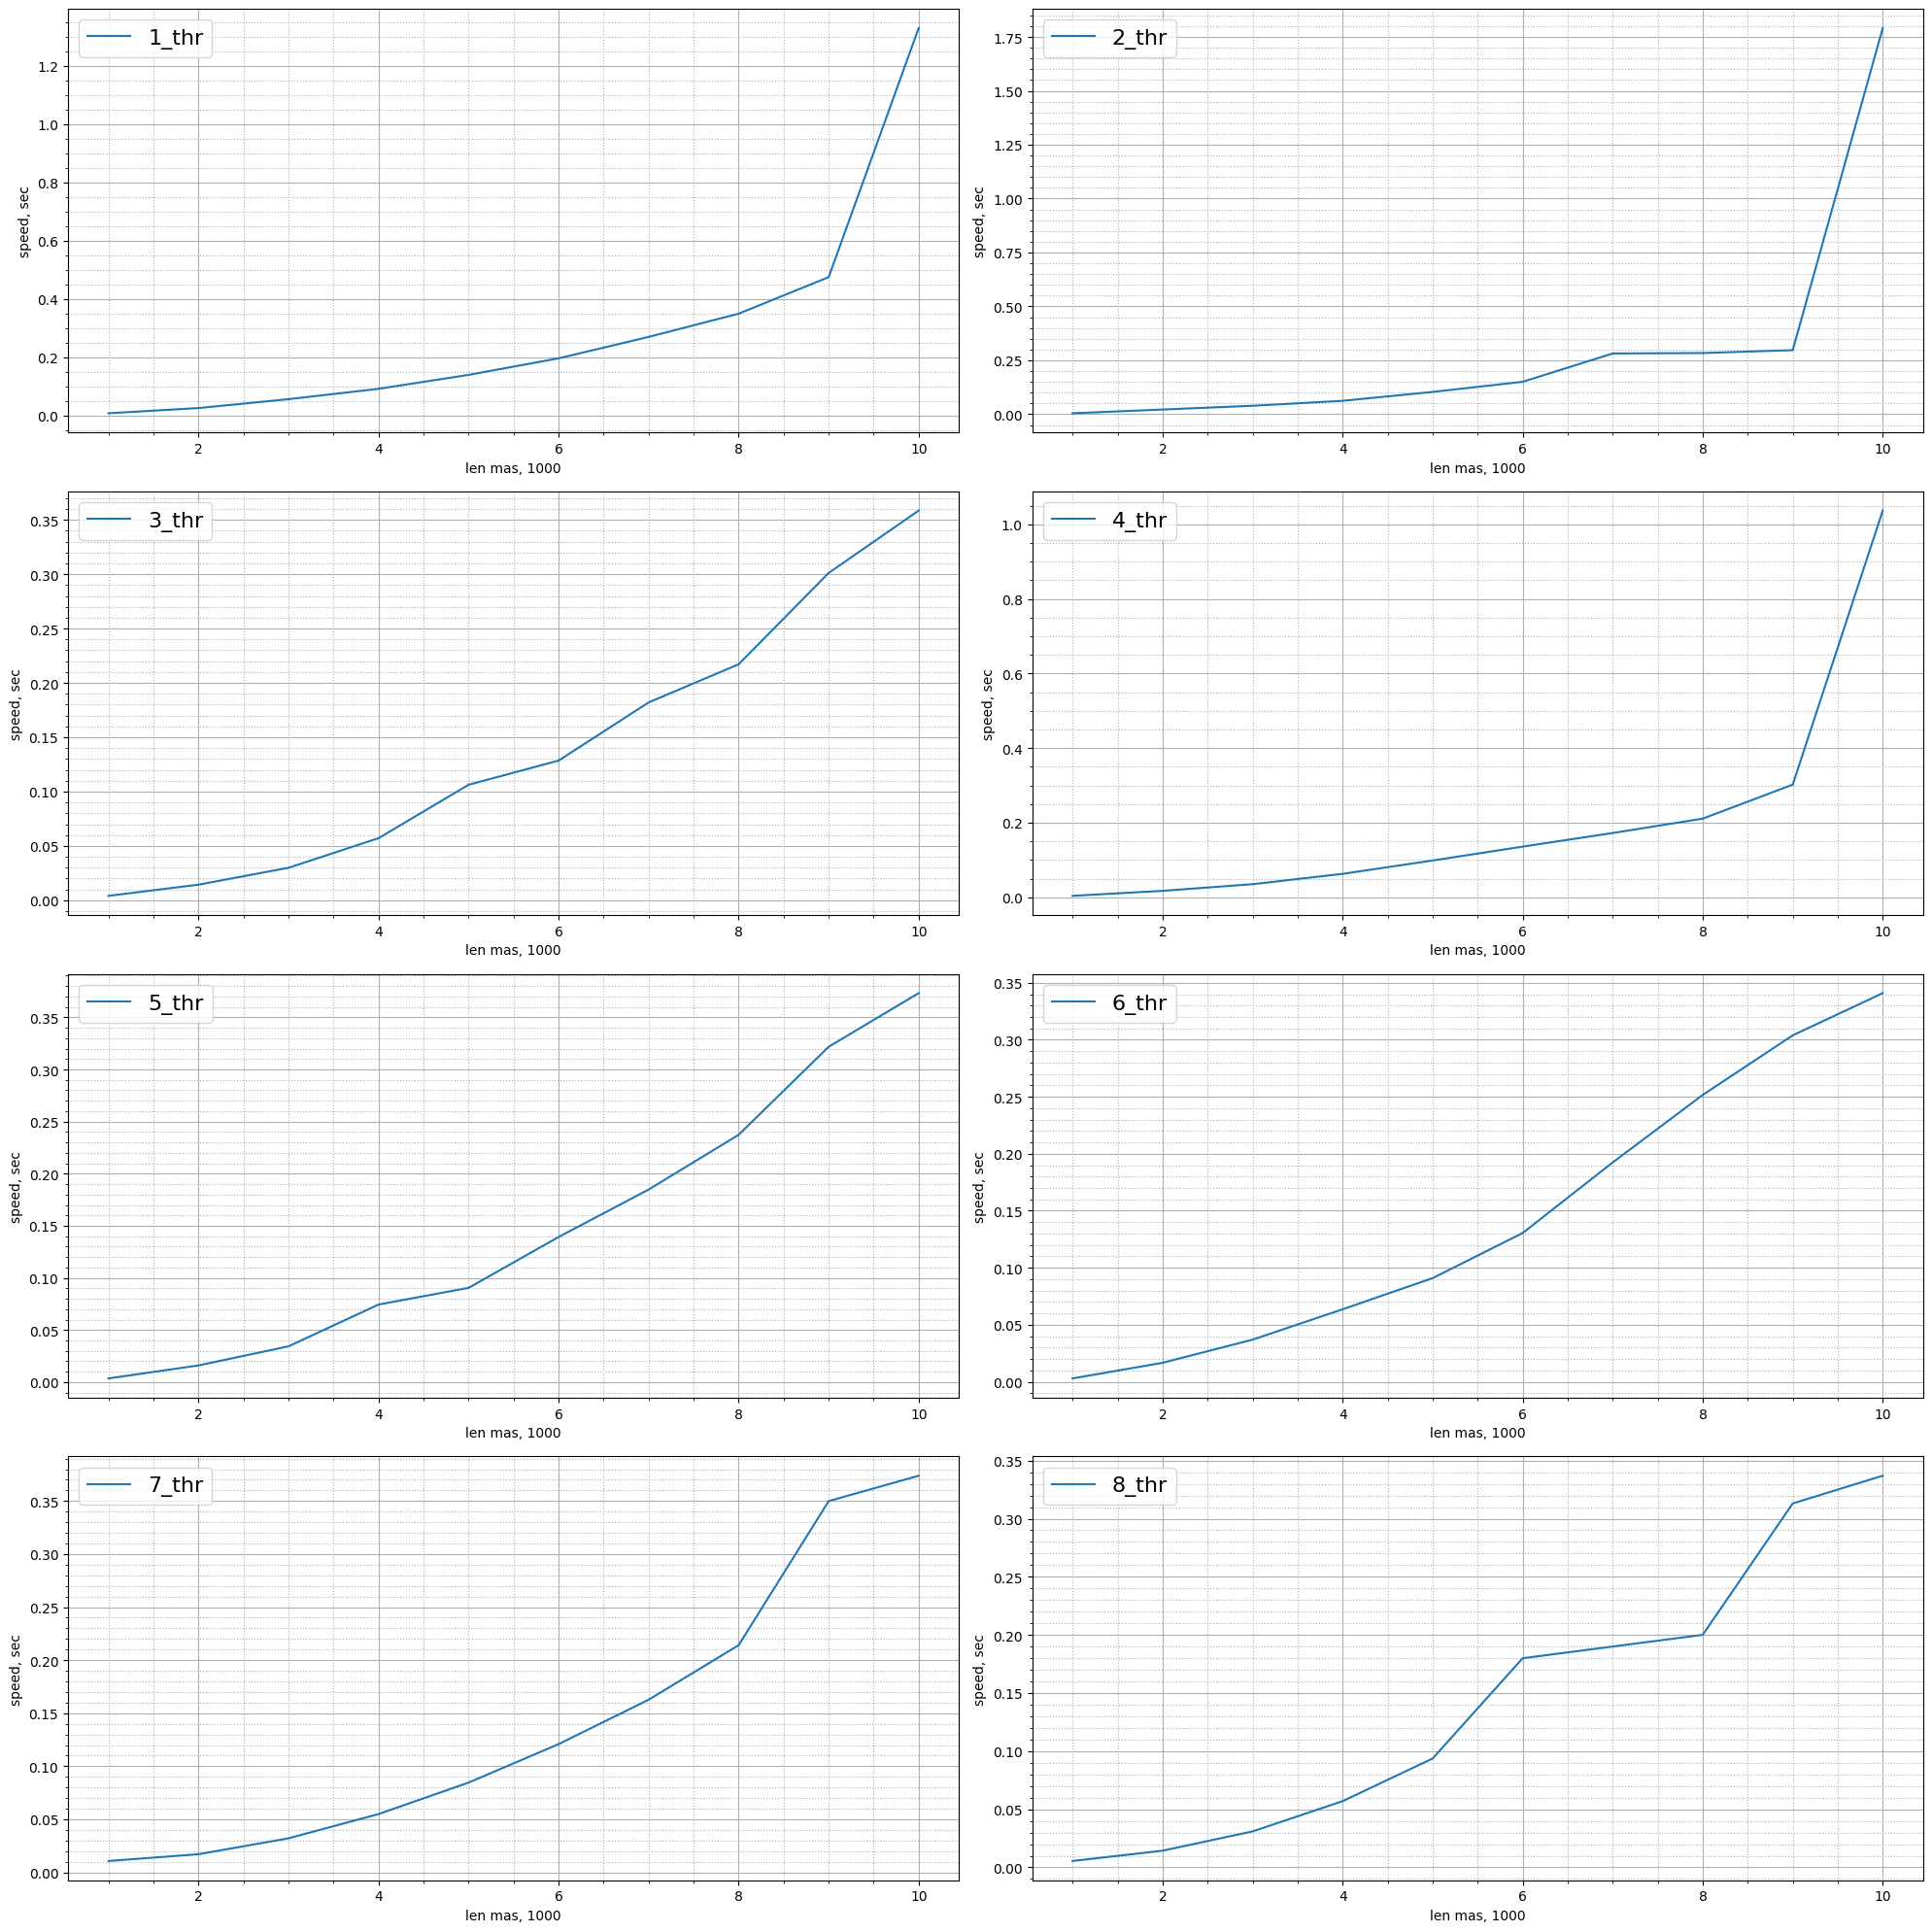

In [3]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
c = 1

for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        pl(c, ax)
        c+=1
        
        ax.set_xlabel(r'len mas, 1000', fontsize=10)
        ax.set_ylabel(r'speed, sec', fontsize=10)
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')

fig.tight_layout()
plt.show()